[]
[]
[]
[]
[]
[ 895  896  897  902  903  904  909  910  911  912  917  918  919  924
  925  926  931  932  933  938  939  940  941  945  946  947  951  952
  953  954  958  959  960  961  966  967  968  969  974  975  976  977
  982  983  984  985  990  991  992  997  998  999 1000 1005 1006 1007
 1008 1013 1014 1015 1020 1021 1022 1027 1028 1029 1030 1034 1035 1036
 1037 1041 1042 1043 1044 1048 1049 1050 1051 1056 1057 1058 1059 1064
 1065 1066 1067 1072 1073 1074 1079 1080 1081 1082 1087 1088 1089 1090
 1095 1096 1097 1098 1103 1104 1105 1106 1111 1112 1113 1114 1119 1120
 1121 1122 1127 1128 1129 1130 1135 1136 1137 1138 1143 1144 1145 1146
 1151 1152 1153 1154 1161 1162 1163 1164 1170 1171 1172 1173 1178 1179
 1180 1181 1186 1187 1188 1189 1194 1195 1196 1197]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[ 891  892  893  894  898  899  900  901  905  906  907  908  913  914
  915  916  920  921  922  923  927  928  929  930  934  935  936  937
  942  943  944  948  949  950  955  956  957  962 

ValueError: Range cannot be empty (low >= high) unless no samples are taken

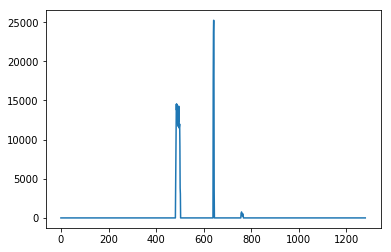

In [7]:
try:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
except:
    pass

import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("/home/abhinav/Desktop/ENPM673/Project2/data/challenge_video.mp4")
K = np.array([[  1.15422732e+03,0.00000000e+00,6.71627794e+02],
              [  0.00000000e+00,1.14818221e+03,3.86046312e+02],
              [  0.00000000e+00,0.00000000e+00,1.00000000e+00]])
dist = np.array([ -2.42565104e-01,-4.77893070e-02,  -1.31388084e-03,  -8.79107779e-05,
    2.20573263e-02])
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv2.LUT(image, lookUpTable)
    return res
def preprocessing(frame):
    th = np.median(frame[int(frame.shape[0]/2):,:,:])
#     frame = adjust_gamma(frame,gamma=1.5)
#     undist = cv2.undistort(frame,K,dist)
#     blur = cv2.bilateralFilter(undist,9,75,75)
#     median = cv2.medianBlur(blur,5)
    
    
#     gray = cv2.cvtColor(median, cv2.COLOR_BGR2HLS)
#     s_channel = gray[:,:,2]
#     l_channel = gray[:,:,1]
    
    #Create mask for S Channel
    if th<60:
        s_channel = adjust_gamma(frame,gamma=25.0)
        undist = cv2.undistort(frame,K,dist)
        blur = cv2.bilateralFilter(undist,9,75,75)
        median = cv2.medianBlur(blur,5)


        gray = cv2.cvtColor(median, cv2.COLOR_RGB2LAB)
        s_channel = gray[:,:,2]
        l_channel = gray[:,:,0]
        s_min = 135
        s_max = 250
        
        l_min = 200
        l_max = 255
        
        mask1 = np.zeros([s_channel.shape[0],s_channel.shape[1]])
        mask1[(s_channel>=s_min)&(s_channel<=s_max)]=1
        
        mask2 = np.zeros([l_channel.shape[0],l_channel.shape[1]])
        mask2[(l_channel>=l_min)&(l_channel<=l_max)]=1
    
    elif th>130:
        s_channel = adjust_gamma(frame,gamma=1)
        undist = cv2.undistort(frame,K,dist)
        blur = cv2.bilateralFilter(undist,9,75,75)
        median = cv2.medianBlur(blur,5)


        gray = cv2.cvtColor(median, cv2.COLOR_BGR2LAB)
        s_channel = gray[:,:,2]
        l_channel = gray[:,:,0]
        s_min = 150
        s_max = 250
        
        l_min = 220
        l_max = 255
        
        mask1 = np.zeros([s_channel.shape[0],s_channel.shape[1]])
        mask1[(s_channel>=s_min)&(s_channel[1]<=s_max)]=1
        
        
        mask2 = np.zeros([l_channel.shape[0],l_channel.shape[1]])
        mask2[(l_channel>=l_min)&(l_channel<=l_max)]=1
    else:
        undist = cv2.undistort(frame,K,dist)
        blur = cv2.bilateralFilter(undist,9,75,75)
        median = cv2.medianBlur(blur,5)


        gray = cv2.cvtColor(median, cv2.COLOR_BGR2LAB)
        s_channel = gray[:,:,2]
        l_channel = gray[:,:,0]
        s_min = 150
        s_max = 250
        
        l_min = 190
        l_max = 255
        
        mask1 = np.zeros([s_channel.shape[0],s_channel.shape[1]])
        mask1[(s_channel>=s_min)&(s_channel[1]<=s_max)]=1
        
        mask2 = np.zeros([l_channel.shape[0],l_channel.shape[1]])
        mask2[(l_channel>=l_min)&(l_channel<=l_max)]=1
    
    combined = np.zeros([frame.shape[0],frame.shape[1]])
    combined[(mask1==1)|(mask2==1)]=1
    mask = np.uint8(255*combined/np.max(combined))
#     mask = cv2.inRange(median,np.array([0,190,80]),np.array([255,255,150]))
    seg = cv2.bitwise_and(frame,median,mask=mask)
    return seg,combined,th
while(True):
    ret,frame = cap.read()

    seg,combined,th = preprocessing(frame)
    #Extract the region of interest and warp to get bird's eye view
    h = frame.shape[0]
    w = frame.shape[1]
#     src = np.array([[w/2-50,h/2+110],[w/2+50,h/2+110],[w/2+400,h/2],[w/2-400,h/2]])
#     dst = np.array([[0,0],[w,0],[w,h],[0,h]])
    src = np.array([[375,480],[905,480],[1811,685],[-531,685]])
    dst = np.array([[300,0],[800,0],[800,600],[300,600]])
#     src = np.array([[600,500],[770,500],[1050,680],[350,680]])
#     dst = np.array([[300,300],[700,300],[700,600],[300,600]])
    H,flag = cv2.findHomography(src,dst)
    out= cv2.warpPerspective(seg,H,(w,h))
    out_gray = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(out_gray,100,255,cv2.THRESH_BINARY)

#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(out,str(th),(10,500), font, 4,(255,0,0),2,cv2.LINE_AA)
# #     cv2.putText(l_channel,str(th),(10,500), font, 4,(255,0,0),2,cv2.LINE_AA)
#     cv2.putText(combined,str(th),(10,500), font, 4,(255,0,0),2,cv2.LINE_AA)
    ###########################################
    #Histogram
    histogram = np.sum(thresh1[thresh1.shape[0]/2:,:],axis = 0)
    plt.plot(histogram)
    mid = np.int((dst[0][0]+dst[1][0])/2)
#     mid = np.int(histogram.shape[0]/2)
    left_lane = np.argmax(histogram[:mid])
    right_lane = np.argmax(histogram[mid:])+mid
    
    wndw = 50
    wndw_ht = np.int(thresh1.shape[0]/wndw)
    
    nonzero = thresh1.nonzero()
    x = np.array(nonzero[0])
    y = np.array(nonzero[1])
    
    left_curr = left_lane
    right_curr = right_lane
    
    margin = 20
    
    minPix = 50
    
    #Find indices for left and right pixels
    left_inds = []
    right_inds = []
    
    for win in range(wndw):
        y_min = thresh1.shape[0] - (win+1)*wndw_ht
        y_max = thresh1.shape[0] - (win)*wndw_ht
        x_min_left = left_curr - margin
        x_max_left = left_curr + margin
        x_min_right = right_curr - margin
        x_max_right = right_curr + margin
        
        cv2.rectangle(out,(x_min_left,y_min),(x_max_left,y_max),(255,0,255),2)
        cv2.rectangle(out,(x_min_right,y_min),(x_max_right,y_max),(255,0,0),2)
        
        left_ind = ((y>=y_min)&(y<y_max)&(x>=x_min_left)&(x<x_max_left)).nonzero()[0]
        right_ind = ((y>=y_min)&(y<y_max)&(x>=x_min_right)&(x<x_max_right)).nonzero()[0]
        
        left_inds.append(left_ind)
        right_inds.append(right_ind)
        #If no. of white pixels > minPix then start
        
        print(left_ind)
        #the new window form their median position
        if len(left_inds)>minPix:
            left_curr = np.int(np.mean(x[left_ind]))
        if len(right_inds)>minPix:
            right_curr = np.int(np.mean(x[right_ind]))
            
    left_inds = np.concatenate(left_inds)
    right_inds = np.concatenate(right_inds)
    
    x_left = x[left_inds]
    x_right = x[right_inds]
    y_left = y[left_inds]
    y_right = y[right_inds]
    
    ##################################################
    #Fit a Curve using RANSAC
#     left_laneFit = ransac_polyfit(x_left, y_left, order=3, n=20, k=100, t=0.1, d=100, f=0.8)
#     right_laneFit = ransac_polyfit(x_right, y_right, order=3, n=20, k=100, t=0.1, d=100, f=0.8)
    left_laneFit =  np.polyfot
    right_laneFit = np.polyfit(y_right,x_right,2)
    
    


    
    cv2.imshow('s',out)
    cv2.imshow('l',thresh1)
#     cv2.imshow('test',l_channel)
#     cv2.imshow('mask',mask)
    if cv2.waitKey(1)& 0xff==ord('q'):
        cv2.destroyAllWindows()
        break

thresh1.nonzero()

In [2]:
def ransac_polyfit(x, y, order=3, n=20, k=100, t=0.1, d=100, f=0.8):
  # Thanks https://en.wikipedia.org/wiki/Random_sample_consensus
  
  # n – minimum number of data points required to fit the model
  # k – maximum number of iterations allowed in the algorithm
  # t – threshold value to determine when a data point fits a model
  # d – number of close data points required to assert that a model fits well to data
  # f – fraction of close data points required
  
  besterr = np.inf
  bestfit = None
  for kk in xrange(k):
    maybeinliers = np.random.randint(len(x), size=n)
    maybemodel = np.polyfit(x[maybeinliers], y[maybeinliers], order)
    alsoinliers = np.abs(np.polyval(maybemodel, x)-y) < t
    if sum(alsoinliers) > d and sum(alsoinliers) > len(x)*f:
      bettermodel = np.polyfit(x[alsoinliers], y[alsoinliers], order)
      thiserr = np.sum(np.abs(np.polyval(bettermodel, x[alsoinliers])-y[alsoinliers]))
      if thiserr < besterr:
        bestfit = bettermodel
        besterr = thiserr
  return bestfit

In [17]:
np.argmax(histogram[:600])

432

In [18]:
np.argmax(histogram[600:])

271

In [20]:
a = np.array([1,2,3,4,5,6,7,8,9])

In [23]:
np.argmax(a[5:])

3